In [4]:
import pandas as pd
from helpers.idf_helpers import *
from helpers.plot_helpers import *
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from eppy.modeleditor import IDF
from IPython.display import display

import os

para ver como manipular fechas en time series:

https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea

## Primer estudio 
Input: eppyProject/input/simple_room_1_window_1_door.idf

with obj ['PEOPLE', 'LIGHTS', 'ELECTRICEQUIPMENT'] deleted (no lights, people or electricequipment)

Variables: ['Site Outdoor Air Drybulb Temperature','Zone Air Temperature']

python Script: TemperaturaStudy.py

In [6]:
data1 = eso_to_ts('studies/TemperatureStudy1/eplusout.csv')

idffile = 'studies/TemperatureStudy1/idffile.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf1 = initialization(idffile, iddfile, epwfile)

In [7]:
@interact
def show_not_null_classes(classes = notnullobj(idf1)):
    return epobject_to_df(idf1.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

## segundo estudio

Input: 'eppyProject/input/simple_room_1_window_1_door_ventilator_constant.idf'.idf

Using HVACTemplate:System:Unitary

Heating_Setpoint_Schedule_Name 	Always On Continuous

with obj ['PEOPLE', 'LIGHTS', 'ELECTRICEQUIPMENT'] deleted (no lights, people or electricequipment)

Variables: ['Site Outdoor Air Drybulb Temperature','Zone Air Temperature']

python Script: TemperaturaStudy2.py


In [9]:
data2 = eso_to_ts('/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/studies/TemperatureStudy2/eplusout.csv')
idffile = 'studies/TemperatureStudy2/idffile.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf2 = initialization(idffile, iddfile, epwfile)

In [10]:
data2.head()

,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),THERMAL ZONE 1:Zone Air Temperature [C](Hourly),ALWAYS ON CONTINUOUS:Schedule Value [](Hourly)
Date/Time,,,
2000-01-01 01:00:00,4.358333,13.196292,1.0
2000-01-01 02:00:00,3.716667,12.797883,1.0
2000-01-01 03:00:00,4.883333,12.866066,1.0
2000-01-01 04:00:00,5.650000,12.940725,1.0
2000-01-01 05:00:00,6.016667,12.973265,1.0


In [11]:
@interact
def show_not_null_classes(classes = notnullobj(idf2)):
    return epobject_to_df(idf2.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

<AxesSubplot:xlabel='Date/Time'>

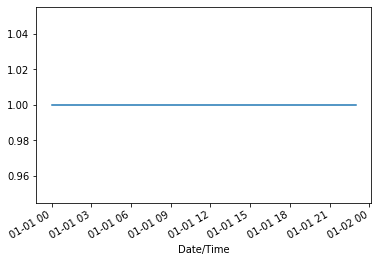

In [12]:
data2['2000-01-01'].iloc[:,2].plot()

<AxesSubplot:xlabel='Date/Time'>

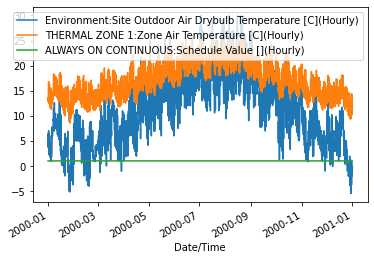

In [13]:
data2.plot()

## Tercer estudio 
### igual que el primero pero con gente

Input: 'eppyProject/input/simple_room_1_window_1_door.idf'.idf

Using HVACTemplate:System:Unitary

Heating_Setpoint_Schedule_Name Always On Continuous

with obj ['', 'LIGHTS', 'ELECTRICEQUIPMENT'] deleted (no lights, people or electricequipment)

Variables: ['Site Outdoor Air Drybulb Temperature','Zone Air Temperature']

python Script: TemperaturaStudy2.py


In [14]:
data3 = eso_to_ts('studies/TemperatureStudy3/eplusout.csv')

idffile = 'studies/TemperatureStudy3/idffile.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf3 = initialization(idffile, iddfile, epwfile)

In [15]:
@interact
def show_not_null_classes(classes = notnullobj(idf3)):
    return epobject_to_df(idf3.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

<AxesSubplot:xlabel='Date/Time'>

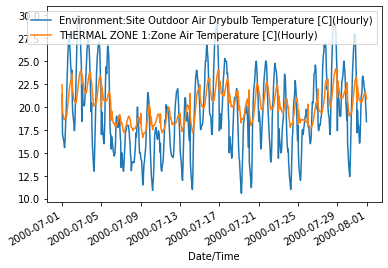

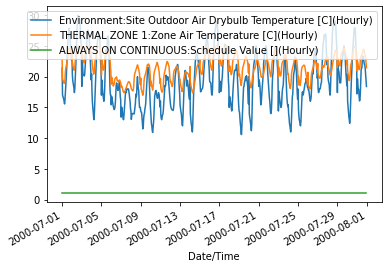

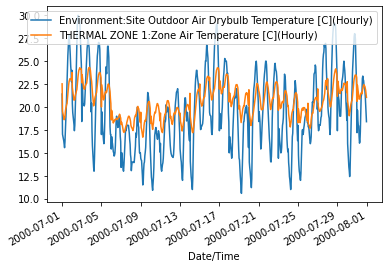

In [16]:
# Verano mes de Julio
data1[data1.index.month == 7].plot()
data2[data2.index.month == 7].plot()
data3[data3.index.month == 7].plot()

In [17]:
data_env = data1['Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)']

In [18]:
data1_w = data1[data1.index.month == 1].iloc[:,1]
data2_w = data2[data2.index.month == 1].iloc[:,1]
data3_w = data3[data3.index.month == 1].iloc[:,1]

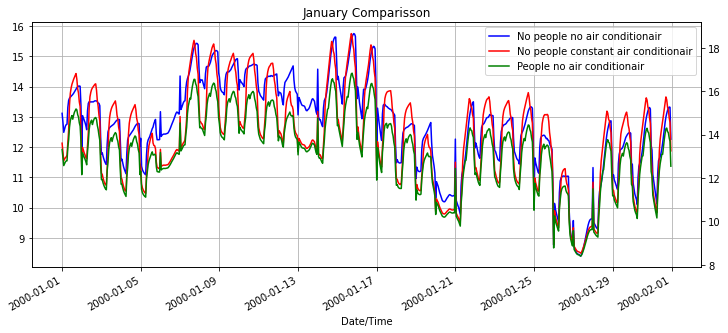

In [19]:
plt.figure(figsize=(12,5))
plt.xlabel('Number of requests every 10 minutes')

ax1 = data1_w.plot(color='blue', grid=True, label='No people no air conditionair')
ax2 = data2_w.plot(color='red', grid=True, secondary_y=True, label='No people constant air conditionair')
ax3 = data3_w.plot(color='green', grid=True, secondary_y=True, label='People no air conditionair')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
plt.title('January Comparisson')
plt.legend(h1+h2, l1+l2, loc=0)


In [20]:
data1_s = data1[data1.index.month == 8].iloc[:,1]
data2_s = data2[data2.index.month == 8].iloc[:,1]
data3_s = data3[data3.index.month == 8].iloc[:,1]

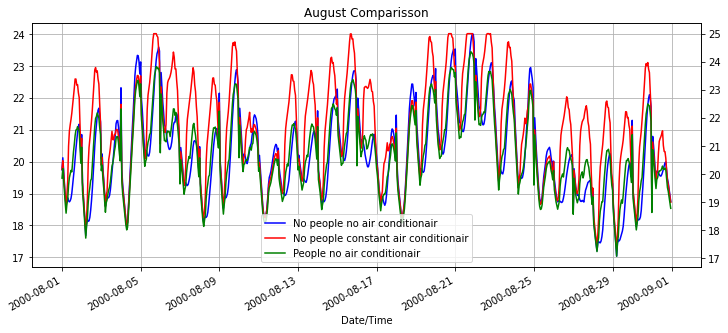

In [22]:
plt.figure(figsize=(12,5))
plt.xlabel('Number of requests every 10 minutes')

ax1 = data1_s.plot(color='blue', grid=True, label='No people no air conditionair')
ax2 = data2_s.plot(color='red', grid=True, secondary_y=True, label='No people constant air conditionair')
ax3 = data3_s.plot(color='green', grid=True, secondary_y=True, label='People no air conditionair')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
plt.title('August Comparisson')
plt.legend(h1+h2, l1+l2, loc=0)

## One day - winter

In [23]:
data1_wd = data1[(data1.index.month == 1) & ((data1.index.day == 8)|(data1.index.day == 9)|(data1.index.day == 10))].iloc[:,1]
data2_wd = data2[(data2.index.month == 1) & ((data2.index.day == 8)|(data2.index.day == 9)|(data2.index.day == 10))].iloc[:,1]
data3_wd = data3[(data3.index.month == 1) & ((data3.index.day == 8)|(data3.index.day == 9)|(data3.index.day == 10))].iloc[:,1]
data_env_wd = data_env[(data_env.index.month == 1) & ((data_env.index.day == 8)|(data_env.index.day == 9)|(data_env.index.day == 10))]

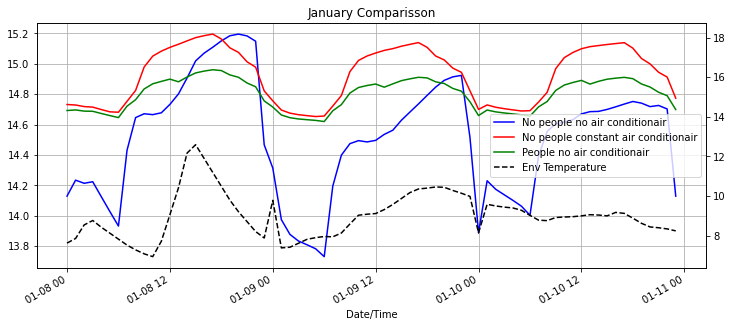

In [24]:
plt.figure(figsize=(12,5))
plt.xlabel('Number of requests every 10 minutes')

ax1 = data1_wd.plot(color='blue', grid=True, label='No people no air conditionair')
ax2 = data2_wd.plot(color='red', grid=True, secondary_y=True, label='No people constant air conditionair')
ax3 = data3_wd.plot(color='green', grid=True, secondary_y=True, label='People no air conditionair')
ax4 = data_env_wd.plot(linestyle = '--',color='black', grid=True, secondary_y=True, label='Env Temperature')
# TODO trazar una linea con la supuesta temperatura de confort

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
h4, l4 = ax4.get_legend_handles_labels()

plt.title('January Comparisson')
plt.legend(h1+h2, l1+l2, loc=0)

Es verano lo que jode don las altas temperaturas...

## One day - Summer

In [25]:
data1_sd = data1[(data1.index.month == 8) & ((data1.index.day == 8)|(data1.index.day == 9)|(data1.index.day == 10))].iloc[:,1]
data2_sd = data2[(data2.index.month == 8) & ((data2.index.day == 8)|(data2.index.day == 9)|(data2.index.day == 10))].iloc[:,1]
data3_sd = data3[(data3.index.month == 8) & ((data3.index.day == 8)|(data3.index.day == 9)|(data3.index.day == 10))].iloc[:,1]
data_env_sd = data_env[(data_env.index.month == 8) & ((data_env.index.day == 8)|(data_env.index.day == 9)|(data_env.index.day == 10))]


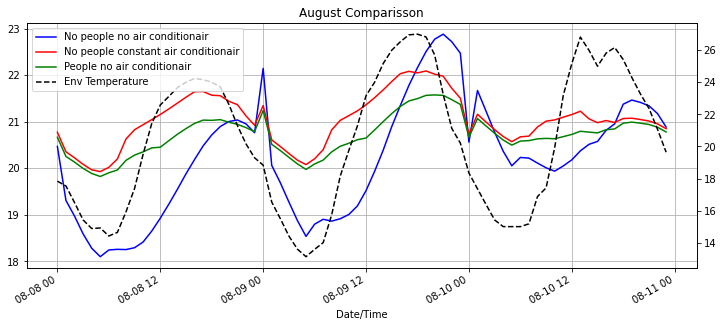

In [26]:
plt.figure(figsize=(12,5))
plt.xlabel('Number of requests every 10 minutes')

ax1 = data1_sd.plot(color='blue', grid=True, label='No people no air conditionair')
ax2 = data2_sd.plot(color='red', grid=True, secondary_y=True, label='No people constant air conditionair')
ax3 = data3_sd.plot(color='green', grid=True, secondary_y=True, label='People no air conditionair')
ax4 = data_env_sd.plot(linestyle = '--',color='black', grid=True, secondary_y=True, label='Env Temperature')


h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
plt.title('August Comparisson')
plt.legend(h1+h2, l1+l2, loc=0)

In [27]:
# NO PEOPLE NO AIR CONDITIONAIR TIENE QUE TENER ALGO XQ SUBE Y LUEGO HACE UN VALLE... NO TIENE SENTIDO

Esta gráfica que comprende los dçias 8-9-10 de agosto. se puede observar comparando la linea azul con la de puntos, la inrcia términca que realizan los muros al ser el único aislante térmico en ese caso. Por otro lado se observa un especie de pico a las 00:00 de la noche qen todas las gráficas... Tengo que repasar si hay algo que se encienda o si es un fallo.....

Por lógica debería haber maypr diferencia durante la noche en el estidio con gente y sin aire acondicionado que sin gente y con aire acondicionado......... 

__TemperatureStudy4__:

- PEOPLE: SÍ
- LIGHTS: NO
- ELECTRICEQUIPMENT: NO
- AIRCONDITIONER: SÍ
  - DATOS:
              key 	HVACTemplate:Thermostat
              Name 	thermostat 1
              Heating_Setpoint_Schedule_Name 	Always On Continuous
              Constant_Heating_Setpoint 	15
              Cooling_Setpoint_Schedule_Name 	
              Constant_Cooling_Setpoint 	25
              -----------------------------
              fields: 	
              key 	HVACTemplate:Thermostat
              Name 	thermostat 1
              Heating_Setpoint_Schedule_Name 	Always On Continuous
              Constant_Heating_Setpoint 	15
              Cooling_Setpoint_Schedule_Name 	
              Constant_Cooling_Setpoint 	25
              -------------------------------
              key 	HVACTemplate:Zone:Unitary
              Zone_Name 	Thermal Zone 1
              Template_Unitary_System_Name 	system 1
              Template_Thermostat_Name 	thermostat 1
              Supply_Air_Maximum_Flow_Rate 	autosize

In [28]:
idffile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/simple_room_1_window_1_door_unitary_System_sch_constant.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf4 = initialization(idffile,iddfile,epwfile)

In [29]:
@interact
def show_not_null_classes(classes = notnullobj(idf4)):
    return epobject_to_df(idf4.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

In [30]:
data4 = eso_to_ts('studies/TemperatureStudy4/eplusout.csv')

__TemperatureStudy5__:

- PEOPLE: SÍ
- LIGHTS: SÍ
- ELECTRICEQUIPMENT: SÍ
- AIRCONDITIONER: SÍ
  - DATOS:
              key 	HVACTemplate:Thermostat
              Name 	thermostat 1
              Heating_Setpoint_Schedule_Name 	Always On Continuous
              Constant_Heating_Setpoint 	15
              Cooling_Setpoint_Schedule_Name 	
              Constant_Cooling_Setpoint 	25
              -----------------------------
              fields: 	
              key 	HVACTemplate:Thermostat
              Name 	thermostat 1
              Heating_Setpoint_Schedule_Name 	Always On Continuous
              Constant_Heating_Setpoint 	15
              Cooling_Setpoint_Schedule_Name 	
              Constant_Cooling_Setpoint 	25
              -------------------------------
              key 	HVACTemplate:Zone:Unitary
              Zone_Name 	Thermal Zone 1
              Template_Unitary_System_Name 	system 1
              Template_Thermostat_Name 	thermostat 1
              Supply_Air_Maximum_Flow_Rate 	autosize  

In [31]:
idffile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/simple_room_1_window_1_door_unitary_System_sch_small_office_Activity.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf5 = initialization(idffile,iddfile,epwfile)

In [32]:
@interact
def show_not_null_classes(classes = notnullobj(idf5)):
    return epobject_to_df(idf5.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

In [33]:
data5 = eso_to_ts('studies/TemperatureStudy5/eplusout.csv')

In [34]:
idffile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/simple_room_1_window_1_door_unitary_System_sch_small_office_Activity.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf6 = initialization(idffile,iddfile,epwfile)

In [35]:
@interact
def show_not_null_classes(classes = notnullobj(idf6)):
    return epobject_to_df(idf6.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

In [36]:
data6 = eso_to_ts('studies/TemperatureStudy6/eplusout.csv')

<AxesSubplot:xlabel='Date/Time'>

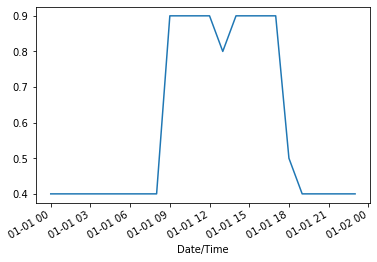

In [38]:
data6['2000-01-01'].iloc[:,2].plot()

Estudios:

1. la casita sola
2. la casita con solo con aire acondicionado continuo
3. la casita solo con gente
4. la casita con gente y aire acondicionado continuo
5. la casita con luces gente y aure acondicionado continuo (lo normal)
6. la casita con luces gente y aire acondicionado según ocupación.

Por úlyimo compara 5 y 6


In [39]:
data5_sd = data5[(data5.index.month == 8) & ((data5.index.day == 8)|(data5.index.day == 9)|(data5.index.day == 10))].iloc[:,1]
data6_sd = data6[(data6.index.month == 8) & ((data6.index.day == 8)|(data6.index.day == 9)|(data6.index.day == 10))].iloc[:,1]
data_env_sd = data_env[(data_env.index.month == 8) & ((data_env.index.day == 8)|(data_env.index.day == 9)|(data_env.index.day == 10))]

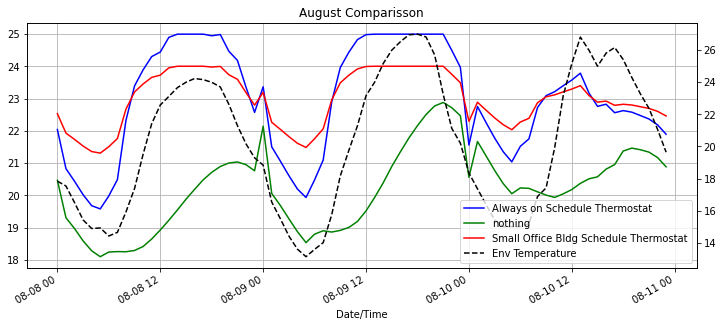

In [40]:
plt.figure(figsize=(12,5))
plt.xlabel('Number of requests every 10 minutes')

ax1 = data5_sd.plot(color='blue', grid=True, label='Always on Schedule Thermostat')
ax2 = data6_sd.plot(color='red', grid=True, secondary_y=True, label='Small Office Bldg Schedule Thermostat')
ax3 = data_env_sd.plot(linestyle = '--',color='black', grid=True, secondary_y=True, label='Env Temperature')
ax4 = data1_sd.plot(color='green', grid=True, label='nothing')



h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
plt.title('August Comparisson')
plt.legend(h1+h2, l1+l2, loc=0)

In [53]:
data5_wd = data5[(data5.index.month == 1) & ((data5.index.day == 8)|(data5.index.day == 9)|(data5.index.day == 10))].iloc[:,1]
data6_wd = data6[(data6.index.month == 1) & ((data6.index.day == 8)|(data6.index.day == 9)|(data6.index.day == 10))].iloc[:,1]

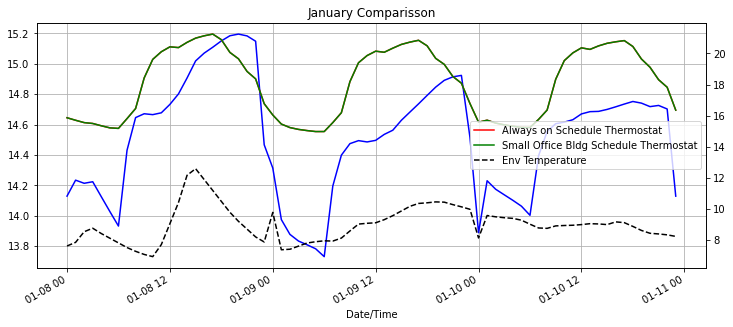

In [122]:
plt.figure(figsize=(12,5))
plt.xlabel('Number of requests every 10 minutes')

ax1 = data1_wd.plot(color='blue', grid=True, label='No people no air conditionair')
ax2 = data5_wd.plot(color='red', grid=True, secondary_y=True, label='Always on Schedule Thermostat')
ax3 = data6_wd.plot(color='green', grid=True, secondary_y=True, label='Small Office Bldg Schedule Thermostat')
ax4 = data_env_wd.plot(linestyle = '--',color='black', grid=True, secondary_y=True, label='Env Temperature')
# TODO trazar una linea con la supuesta temperatura de confort

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
h4, l4 = ax4.get_legend_handles_labels()

plt.title('January Comparisson')
plt.legend(h4, l4, loc=0)

In [45]:
data2['2000-02-02':'2000-04-02']

,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),THERMAL ZONE 1:Zone Air Temperature [C](Hourly),ALWAYS ON CONTINUOUS:Schedule Value [](Hourly)
Date/Time,,,
2000-02-02 01:00:00,7.475000,13.632421,1.0
2000-02-02 02:00:00,7.041667,13.466254,1.0
2000-02-02 03:00:00,6.416667,13.340483,1.0
2000-02-02 04:00:00,6.000000,13.202214,1.0
2000-02-02 05:00:00,6.000000,13.144082,1.0
...,...,...,...
2000-04-02 20:00:00,7.541667,16.407859,1.0
2000-04-02 21:00:00,6.416667,16.142420,1.0
2000-04-02 22:00:00,5.008333,14.728942,1.0


# Winter Study

In [140]:
period = ['2000-01-08','2000-01-10']
data_env = data_env
datalist = [data1.iloc[:,1], data5.iloc[:,1],data6.iloc[:,1]]
titles = ['no people no air', 'constant air conditiones', 'schedule']

[<AxesSubplot:xlabel='Date/Time'>,
 <AxesSubplot:xlabel='Date/Time'>,
 <AxesSubplot:xlabel='Date/Time'>,
 <AxesSubplot:label='1141fa23-b3d6-479e-951b-5a8d982e91c4'>]

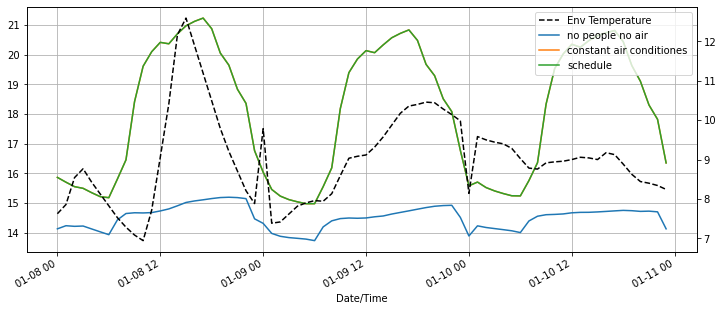

In [194]:
overlay_timeseries(p=period, env_data=data_env , data_list=datalist, titles=titles)


<AxesSubplot:xlabel='Date/Time'>

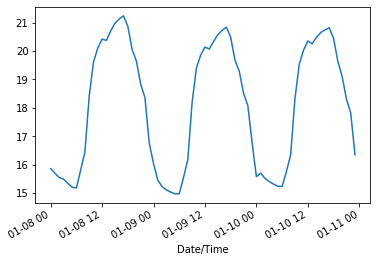

In [197]:
datalist[1][period[0]:period[1]].plot()

In [198]:
datalist[-1] == datalist[-2]

Date/Time
2000-01-01 01:00:00    True
2000-01-01 02:00:00    True
2000-01-01 03:00:00    True
2000-01-01 04:00:00    True
2000-01-01 05:00:00    True
                       ... 
2000-12-31 20:00:00    True
2000-12-31 21:00:00    True
2000-12-31 22:00:00    True
2000-12-31 23:00:00    True
2000-12-31 00:00:00    True
Length: 8760, dtype: bool

In [152]:
ax[-1].plot()

[]

In [137]:
for i, data in enumerate(datalist):
    print(data)

                     Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)  \
Date/Time                                                                           
2000-01-01 01:00:00                                           4.358333              
2000-01-01 02:00:00                                           3.716667              
2000-01-01 03:00:00                                           4.883333              
2000-01-01 04:00:00                                           5.650000              
2000-01-01 05:00:00                                           6.016667              
...                                                                ...              
2000-12-31 20:00:00                                          -1.241667              
2000-12-31 21:00:00                                          -1.141667              
2000-12-31 22:00:00                                          -0.866667              
2000-12-31 23:00:00                                          -0.2

In [85]:
ax

NameError: name 'ax' is not defined